In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from rdd import rdd
from datetime import datetime

In [ ]:
#Code used to format the csv file

#Make a total cases col
cov_cases['Total Cases'] = cov_cases.sum(axis=1)
#Rename the colum
cov_cases = cov_cases.rename(columns={'Date de déclaration du cas':'Date'})
#Make index start at 1
cov_cases.index += 1
#Save as csv with added index 
cov_cases.to_csv('Data/info',index=True)
#Open
cases = pd.read_csv('Data/info')
#Re save without adding index
cases.to_csv('Data/info',index=False)

In [5]:
LOCKDOWN_1 = pd.to_datetime('2020-3-20')        
SCHOOL_OPEN = pd.to_datetime('2020-8-31')
LOCKDOWN_2 = pd.to_datetime('2020-12-25')

In [6]:
cov = pd.read_csv('Data/Covid_Cases_QC')

In [131]:
cov['Day_sq'] = cov['Day'].apply(np.square)

In [134]:
cov

,Day,Date,Par lien épidémiologique,En laboratoire,Cas,Day_sq
0,1,2020-02-24,0,0,0,1
1,2,2020-02-25,0,1,1,4
2,3,2020-02-26,0,0,0,9
3,4,2020-02-27,0,0,0,16
4,5,2020-02-28,0,1,1,25
...,...,...,...,...,...,...
328,329,2021-01-17,15,1514,1529,108241
329,330,2021-01-18,19,1328,1347,108900
330,331,2021-01-19,8,1518,1526,109561
331,332,2021-01-20,6,1582,1588,110224


In [11]:
cov['Day_sq'] = cov['Day'].apply(np.square)
cov['Date'] = pd.to_datetime(cov['Date'])
LOCKDOWN_1 = pd.to_datetime('2020-3-20')        
SCHOOL_OPEN = pd.to_datetime('2020-8-31')
LOCKDOWN_2 = pd.to_datetime('2020-12-25')

In [239]:
#28 days before and after first lockdown
pre_LD1 = (cov['Date'] > '2020-2-21') & (cov['Date'] <= LOCKDOWN_1 )
post_LD1 = (cov['Date'] > LOCKDOWN_1) & (cov['Date'] <= '2020-5-1' )

#Entire period we are looking at
period1 = (cov['Date'] > '2020-2-21') & (cov['Date'] <= '2020-5-1')

#28 days before and after school opening
pre_sch = (cov['Date'] > '2020-8-3') & (cov['Date'] <= SCHOOL_OPEN)
post_sch = (cov['Date'] > SCHOOL_OPEN) & (cov['Date'] <= '2020-10-12') #6 week periods

period2 = (cov['Date'] > '2020-8-3') & (cov['Date'] <= '2020-10-12')

#28 days before and after xmas lockdown
pre_xmas = (cov['Date'] > '2020-11-27') & (cov['Date'] <= LOCKDOWN_2)
post_xmas = (cov['Date'] > LOCKDOWN_2) & (cov['Date'] <= '2021-1-22')

period3 = (cov['Date'] > '2020-11-27') & (cov['Date'] <= '2021-1-22')

In [240]:
#Time periods for each graph


#Graph 1

#Temp df pre-lockdown 1
temp_prld = cov.loc[pre_LD1]
#Temp df post-lockdown 1
temp_pold = cov.loc[post_LD1]
#Temp df entire period around LD 1
temp_pd1 = cov.loc[period1]

#Graph 2

#Temp df pre-school opening
temp_prsc = cov.loc[pre_sch]
#Temp df post-school opening
temp_posc = cov.loc[post_sch]
#Temp df entire period around school opening 1
temp_pd2 = cov.loc[period2]

#Graph 3

#Temp df pre-lockdown xmas
temp_prxs = cov.loc[pre_xmas]
#Temp df post-lockdown xmas
temp_poxs = cov.loc[post_xmas]
#Temp df entire period around xmas LD
temp_pd3 = cov.loc[period3]

In [241]:
len(temp_prld)

26

In [242]:
#Pre-locdown

X = temp_prld[['Day','Day_sq']]
X = sm.add_constant(X)

y = temp_prld['Cas']

model_1 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_1 = model_1.predict(X)


#model_1.summary()

In [243]:
#Post-Lockdown

X = temp_pold[['Day','Day_sq']]
X = sm.add_constant(X)

y = temp_pold['Cas']

model_2 = sm.OLS(y,X).fit(cov_type='HC2')

y_hat_2 = model_2.predict(X)

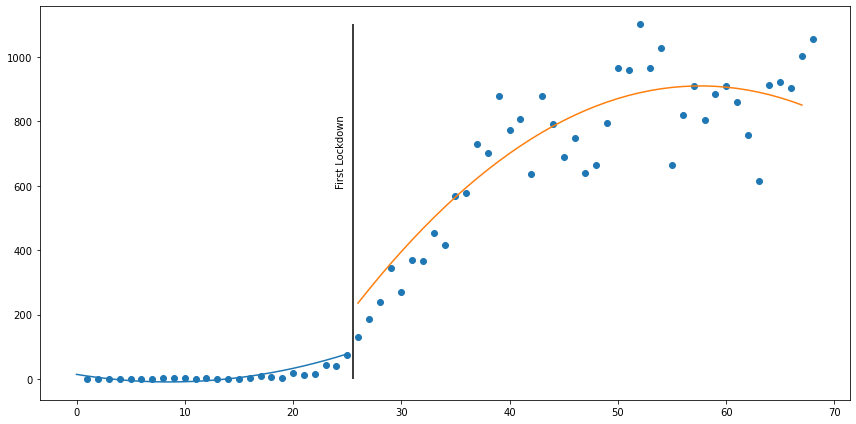

In [244]:
fig, ax = plt.subplots(figsize=(12,6))

plt.scatter(x=temp_pd1.Day,y=temp_pd1.Cas)
plt.plot(y_hat_1)
plt.plot(y_hat_2)
ax.text(y=600,x=24,s='First Lockdown',rotation=90)
ax.vlines(x=25.5,ymin=temp_pd1.Cas.min(),ymax=temp_pd1.Cas.max())
plt.tight_layout()

In [245]:
##################################################

In [249]:
#Pre-School Opening

X = temp_prsc[['Day','Day_sq']]
X = sm.add_constant(X)

y = temp_prsc['Cas']

model_1 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_1 = model_1.predict(X)

#model_1.summary()

In [250]:
#Post-School Opening

X = temp_posc[['Day','Day_sq']]
X = sm.add_constant(X)

y = temp_posc['Cas']

model_2 = sm.OLS(y,X).fit(cov_type='HC2')

y_hat_2 = model_2.predict(X)

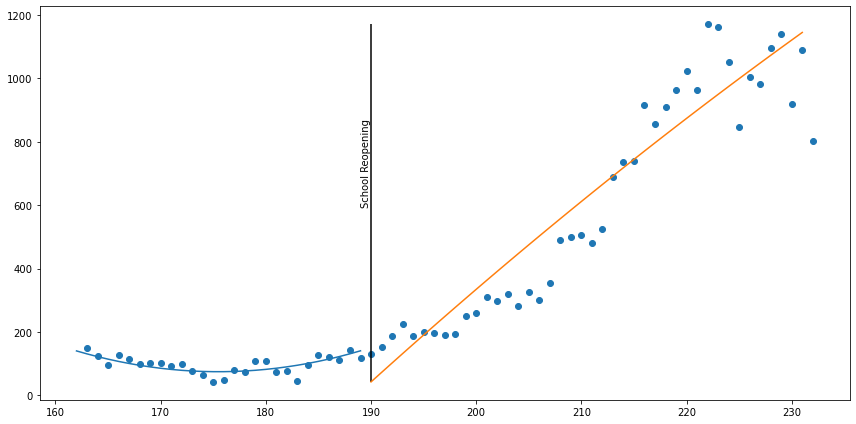

In [251]:
fig, ax = plt.subplots(figsize=(12,6))

plt.scatter(x=temp_pd2.Day,y=temp_pd2.Cas)
plt.plot(y_hat_1)
plt.plot(y_hat_2)
ax.text(y=600,x=189,s='School Reopening',rotation=90)
ax.vlines(x=190,ymin=temp_pd2.Cas.min(),ymax=temp_pd2.Cas.max())
plt.tight_layout()

In [ ]:
########################

In [252]:
#Pre-Xmas Lockdown

X = temp_prxs[['Day','Day_sq']]
X = sm.add_constant(X)

y = temp_prxs['Cas']

model_1 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_1 = model_1.predict(X)

#model_1.summary()

In [253]:
#Post-Xmas Lockdown

X = temp_poxs[['Day','Day_sq']]
X = sm.add_constant(X)

y = temp_poxs['Cas']

model_2 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_2 = model_2.predict(X)

#model_1.summary()

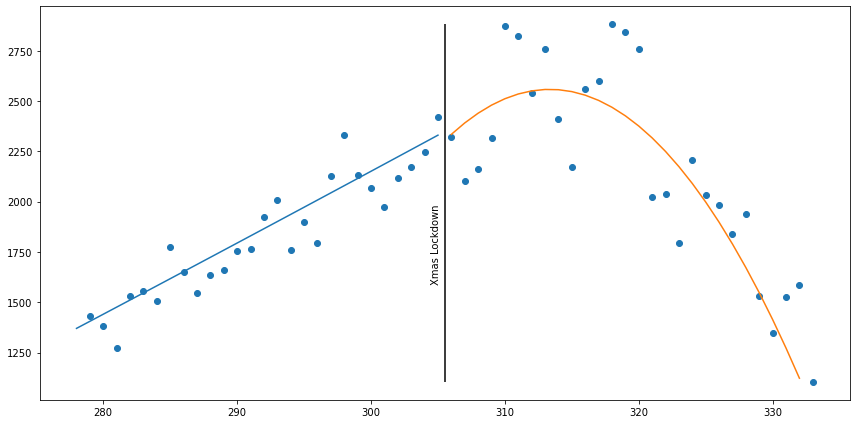

In [254]:
fig, ax = plt.subplots(figsize=(12,6))

plt.scatter(x=temp_pd3.Day,y=temp_pd3.Cas)
plt.plot(y_hat_1)
plt.plot(y_hat_2)
ax.text(y=1600,x=304.5,s='Xmas Lockdown',rotation=90)
ax.vlines(x=305.5,ymin=temp_pd3.Cas.min(),ymax=temp_pd3.Cas.max())
plt.tight_layout()